In [3]:
%load_ext autoreload
%autoreload 2


Unsolved Problem Definition: 
        BotParams(wheelRad=0.0381, jerkLim=1000, accelLim=6, omegaLim=8, alphaLim=15, maxWheelVel=4.8768, botEdgeSize=1)
        (Waypoint: {'x': 0, 'y': 0, 'theta': -1.5707963267948966, 'vx': 0, 'vy': 0, 'ax': 0, 'ay': 0, 'omega': 0, 'alpha': 0}, Waypoint: {'x': 0.75, 'y': 3.0}, Waypoint: {'x': 1, 'y': 4}, Waypoint: {'x': 0.8219949365267865, 'y': 2.9319696191607187}, Waypoint: {'x': 2.4554987341316967, 'y': 3.7329924047901795}, Waypoint: {'x': 3, 'y': 4}, Waypoint: {'x': 2.4659848095803594, 'y': 2.9319696191607187})
        [<trajOpt.constraints.BoundValue object at 0x00000213563D7D40>, <trajOpt.constraints.BoundValue object at 0x00000213563D7D70>]
        Samples: [45, 15, 15, 15, 10, 15]
        Unsolved solution with 115 total samples
        
Problem Build Time: 0.0029959678649902344


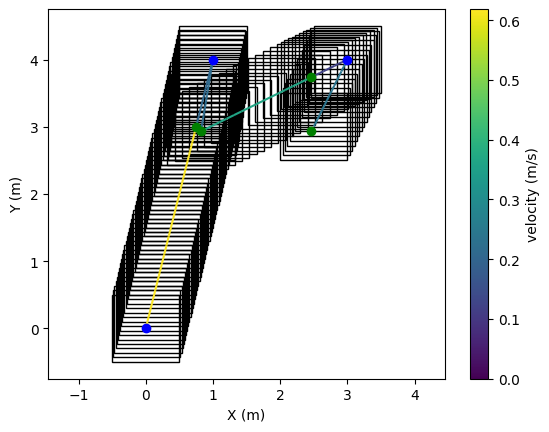

Problem Solve Time: 1.2729802131652832
Solved Solution:
            Trajectory Total Time: 5.875312615025445
            dt per segment: [0.032319179471587765, 0.03231917298531063, 0.06643060516510908, 0.06643062167116143, 0.06643062707492878, 0.08526248471539948]
            


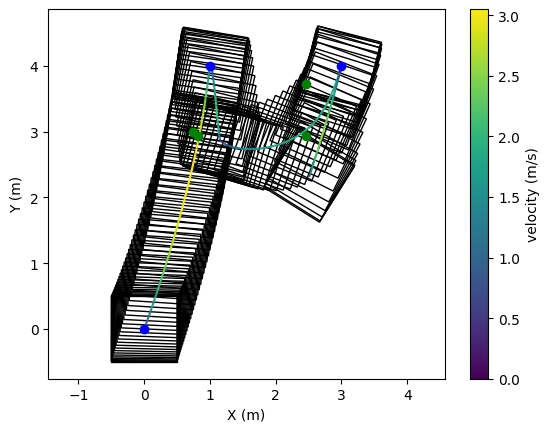

In [1]:

from trajOpt.exampleProblems import driveStraightAroundObsSpecialInitProblem, driveStraightAroundObsProblemBroken, pickupStationProblem, pickupStationProblemApproachLimit,pickup2NotesAndShoot
from trajOpt.plotUtil import plot_value_graph, plot_solution, plot_initialization

import math
problem = pickup2NotesAndShoot()

print(problem)

problem.build()

plot_initialization(problem)

problem.solve(tolerance=1e-4)

print(problem.solution)

plot_solution(problem)


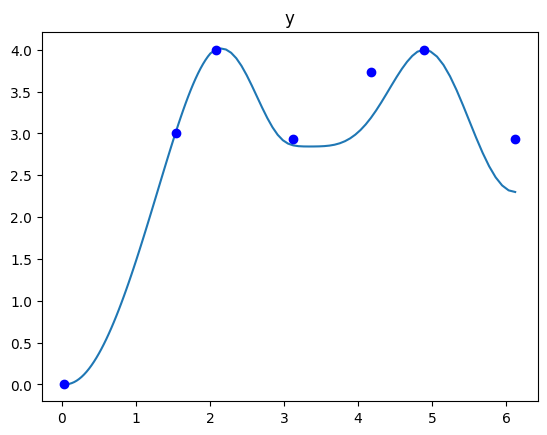

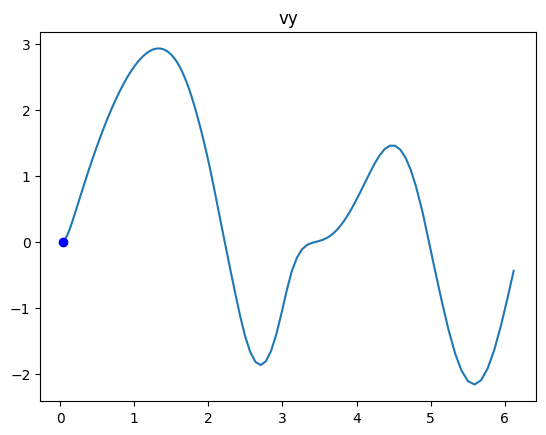

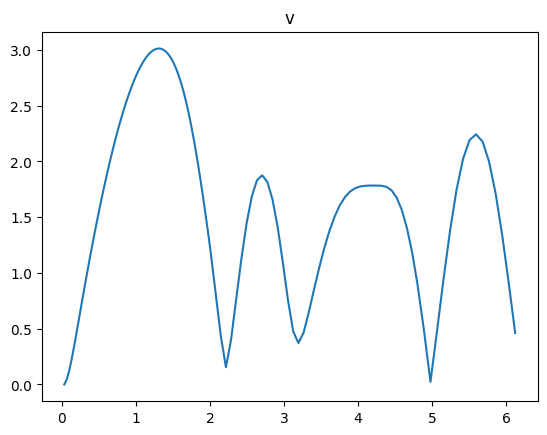

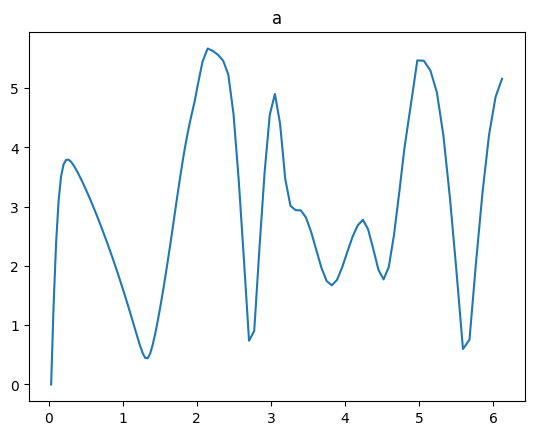

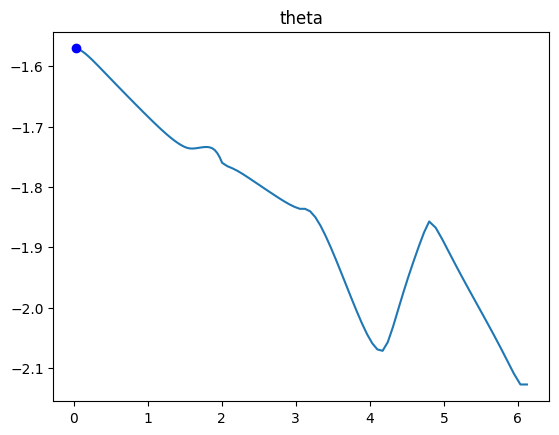

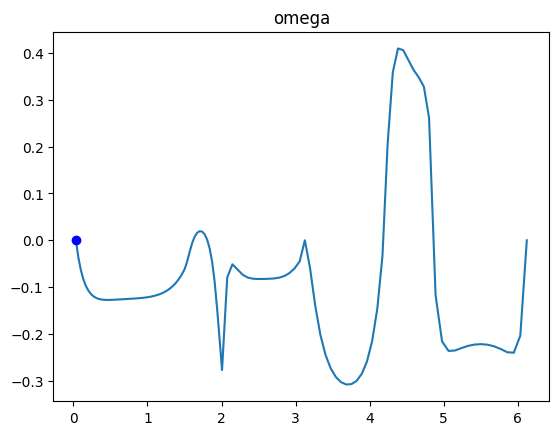

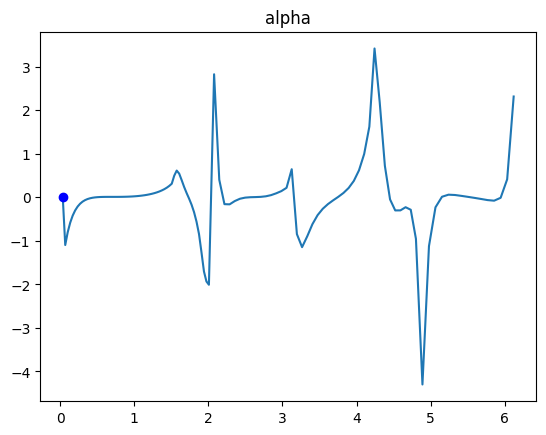

In [2]:

plot_value_graph(problem, 'y')
plot_value_graph(problem, 'vy')
plot_value_graph(problem, 'v')
plot_value_graph(problem, 'a')
plot_value_graph(problem, 'theta')
plot_value_graph(problem, 'omega')
plot_value_graph(problem, 'alpha')


In [2]:
from jormungandr import autodiff
autodiff.sign(4).value()

1.0